In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (example using scikit-learn's built-in dataset)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [3]:
# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

Confusion Matrix:
[[ 62   1]
 [  2 106]]

Precision: 0.9906542056074766
Recall: 0.9814814814814815
ROC-AUC: 0.9979423868312757


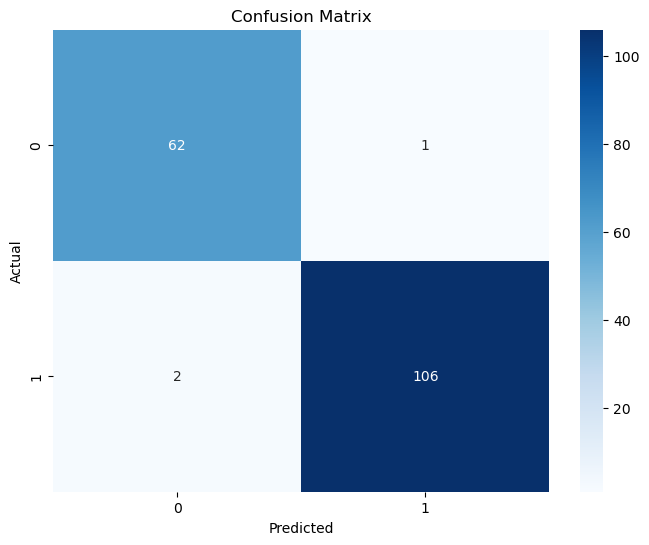

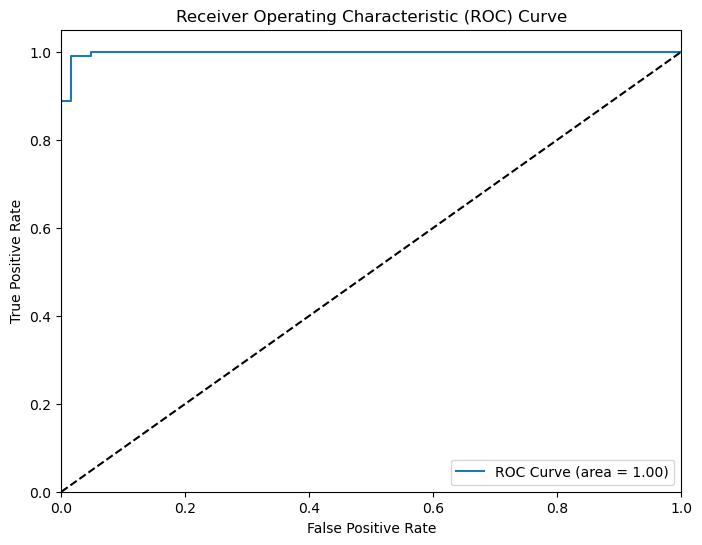

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

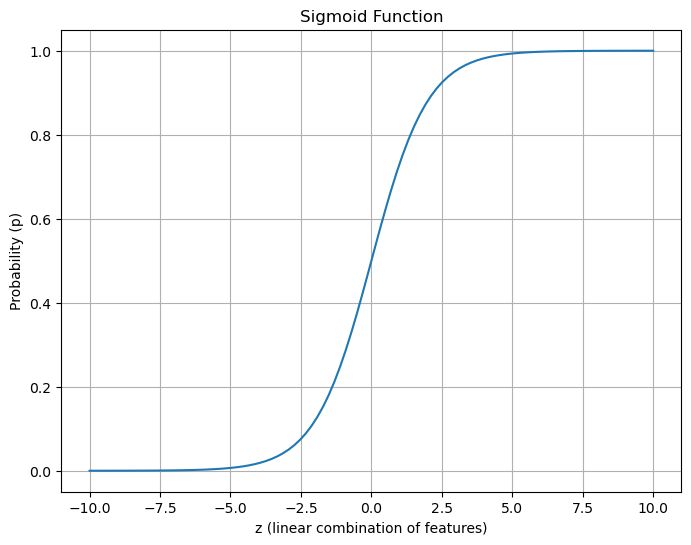


Evaluation with new threshold of 0.3:
Confusion Matrix:
[[ 60   3]
 [  1 107]]

Precision: 0.9727272727272728
Recall: 0.9907407407407407


In [9]:
# Explain the sigmoid function
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sigmoid_output = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_output)
plt.title('Sigmoid Function')
plt.xlabel('z (linear combination of features)')
plt.ylabel('Probability (p)')
plt.grid(True)
plt.show()

# Tune the threshold (example)
# Let's say we want to prioritize recall over precision
new_threshold = 0.3
y_pred_tuned = (y_pred_proba >= new_threshold).astype(int)

print(f"\nEvaluation with new threshold of {new_threshold}:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nPrecision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))

In [11]:
print(X.isnull().sum())
print(y.value_counts(normalize=True))

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
target
1    0.627417
0    0.372583
Name: proportion, dtype: float64
